# testing the main function

In [1]:
import sys

sys.path.append("../../")
sys.path.append("/home/ferroelectric/m3_learning/m3_learning/src")

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model
from m3_learning.nn.Fitter1D.Fitter1D import Multiscale1DFitter, Model

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

2023-08-03 23:07:17.120807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 23:07:17.237444: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-03 23:07:17.603072: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/cv2/../../lib64:
2023-08-03 23:07:17.603120: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


In [3]:
# Specify the filename and the path to save the file
filename = "data_raw_SHO.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins=None, SHO_fit_func_NN=SHO_fit_func_nn,
                     )

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

In [12]:
from scipy.signal import resample
from m3_learning.nn.Fitter1D.Fitter1D import ComplexPostProcessor

x_data = resample(dataset.frequency_bin,
                        dataset.resampled_bins)

In [13]:
postprocessor = ComplexPostProcessor(dataset)

In [14]:
model_ = Multiscale1DFitter(SHO_fit_func_nn, # function 
                            x_data, # x data
                            2, # input channels
                            4, # output channels
                            dataset.SHO_scaler, 
                            postprocessor)

In [15]:
random_seed(seed=42)

# instantiate the model
model = Model(model_, dataset, training=True, model_basename="SHO_Fitter_original_data")

# constructs a test train split
X_train, X_test, y_train, y_test = dataset.test_train_split_(shuffle=True)

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Using GPU NVIDIA GeForce RTX 3090

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 0
    Noise Level = 0
                  
None


In [16]:
train = True

if train:
    # fits the model
    model.fit(
        dataset.X_train,
        500,
        optimizer="Adam",
        epochs = 5,
    )
else:
    model.load(
        "/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/SHO_Fitter_original_data_model_epoch_5_train_loss_0.0449272525189978.pth"
    )

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Adam
epoch : 1/5, recon loss = 0.06927027
--- 24.229342460632324 seconds ---
Adam
epoch : 2/5, recon loss = 0.03483565
--- 25.00181555747986 seconds ---
Adam
epoch : 3/5, recon loss = 0.03439580
--- 25.41604495048523 seconds ---
Adam
epoch : 4/5, recon loss = 0.03420343
--- 24.744691133499146 seconds ---
Adam
epoch : 5/5, recon loss = 0.03409103
--- 25.333948373794556 seconds ---


In [17]:
# insatiate the visualization object
image_scalebar = [2000, 500, "nm", "br"]

BE_viz = Viz(dataset, printing, verbose=True, 
             SHO_ranges = [(0,1.5e-4), (1.31e6, 1.33e6), (-300, 0), (-np.pi, np.pi)],
             image_scalebar=image_scalebar)

In [18]:
model_

Multiscale1DFitter(
  (hidden_x1): Sequential(
    (0): Conv1d(2, 8, kernel_size=(7,), stride=(1,))
    (1): SELU()
    (2): Conv1d(8, 6, kernel_size=(7,), stride=(1,))
    (3): SELU()
    (4): Conv1d(6, 4, kernel_size=(5,), stride=(1,))
    (5): SELU()
    (6): AdaptiveAvgPool1d(output_size=64)
  )
  (hidden_xfc): Sequential(
    (0): Linear(in_features=256, out_features=20, bias=True)
    (1): SELU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): SELU()
  )
  (hidden_x2): Sequential(
    (0): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv1d(2, 4, kernel_size=(5,), stride=(1,))
    (2): SELU()
    (3): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
    (4): SELU()
    (5): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
    (6): SELU()
    (7): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
    (8): SELU()
    (9): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
    (10): SELU()
    (11): Conv1d(4, 4, kernel_size=(5,), stride=(1,))
   

./Figures/Figure_10_NN_validation_Train.png
./Figures/Figure_10_NN_validation_Train.svg


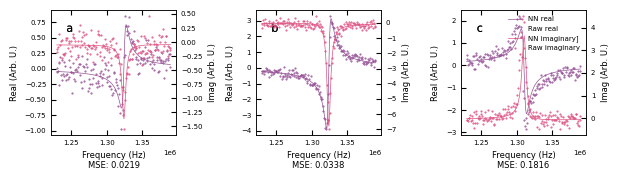

In [19]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_train,
    prediction=model,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename="Figure_10_NN_validation_Train",
)

In [1]:
import sys

sys.path.append("../../")
sys.path.append("/home/ferroelectric/m3_learning/m3_learning/src")

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.nn import Fitter1D 
from m3_learning.be.nn import SHO_fit_func_nn
from m3_learning.be.USID_data import USIDataset


2023-08-02 23:08:14.455008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 23:08:14.576578: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-02 23:08:14.957016: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/cv2/../../lib64:
2023-08-02 23:08:14.957069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

In [7]:
# Specify the filename and the path to save the file
filename = "data_raw_SHO copy.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins=None, SHO_fit_func_NN=SHO_fit_func_nn,
                     )

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

In [4]:
import pyUSID as usid
import h5py
import sidpy

dataset.noise = 0

def measure_group(dataset):
    if dataset.noise == 0:
        return "Raw_Data"
    else:
        return f"Noisy_Data_{dataset.noise}"


with h5py.File(dataset.file, "r+") as h5_f:
    # get the main dataset
    h5_main = usid.hdf_utils.find_dataset(h5_f, measure_group(dataset))
    vs_mode = sidpy.hdf.hdf_utils.get_attr(h5_f["/Measurement_000"], 'VS_mode')
    

In [ ]:
?? USIDataset

In [5]:
# from sidpy.hdf.hdf_utils import get_attr
# from pyUSID.io.hdf_utils import check_if_main, create_results_group, write_reduced_anc_dsets, link_as_main, \
#     get_dimensionality, get_sort_order, get_unit_values, reshape_to_n_dims, write_main_dataset, reshape_from_n_dims


# with h5py.File(dataset.file, "r+") as h5_f:
#     main_dataset = USIDataset(h5_f["/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit"])
    
#     print(main_dataset.name)
#     print(main_dataset.data_descriptor)
#     main_dataset.__orig_pos_dim_labels = get_attr(main_dataset.h5_pos_inds, 'labels')
#     main_dataset.__orig_spec_dim_labels = get_attr(main_dataset.h5_spec_inds, 'labels')
#     # The size of each dimension
#     main_dataset.__orig_pos_dim_sizes = np.array(get_dimensionality(np.transpose(main_dataset.h5_pos_inds)))
#     main_dataset.__orig_spec_dim_sizes = np.array(get_dimensionality(np.atleast_2d(main_dataset.h5_spec_inds)))

#     pos_str = ' \n'.join(['\t{} - size: {}'.format(dim_name, str(dim_size)) for dim_name, dim_size in
#                               zip(main_dataset.__orig_pos_dim_labels, main_dataset.__orig_pos_dim_sizes)])
#     spec_str = ' \n'.join(['\t{} - size: {}'.format(dim_name, str(dim_size)) for dim_name, dim_size in
#                                zip(main_dataset.__orig_spec_dim_labels, main_dataset.__orig_spec_dim_sizes)])
    
#     print(pos_str)
    
#     print(spec_str)
    
#     usid_str = ' \n'.join(['located at:',
#                  '\t' + main_dataset.name,
#                              'Data contains:', '\t' + main_dataset.data_descriptor,
#                              'Data dimensions and original shape:',
#                              'Position Dimensions:',
#                              pos_str,
#                              'Spectroscopic Dimensions:',
#                              spec_str])

/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit
SHO (compound)
	Y - size: 60 
	X - size: 60
	DC_Offset - size: 96 
	Field - size: 2 
	Cycle - size: 2


In [6]:
import h5py


with h5py.File(dataset.file, "r+") as h5_f:
    
    main_dataset = USIDataset(h5_f["/Noisy_Data_1_SHO_Fit/Noisy_Data_1-SHO_Fit_000/Fit"])
    dataset.LSQF_Loop_Fit(main_dataset = main_dataset)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Noisy_Data_1_SHO_Fit/Noisy_Data_1-SHO_Fit_000/Fit-Loop_Fit_000" (7 members)>]


/home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/BGlib/be/analysis/fitter.py:140: UserWarning: status dataset not created yet
  warn('status dataset not created yet')
/home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/BGlib/be/analysis/utils/be_loop.py:497: RuntimeWarning: invalid value encountered in divide
  nuc_v01a = bnv[2] * erfinv((nuc_threshold * bnv[2] + nuc_threshold * bnv[3] - bnv[2]) / bnv[2]) + anv[3]
/home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/BGlib/be/analysis/utils/be_loop.py:498: RuntimeWarning: invalid value encountered in divide
  nuc_v01b = bnv[3] * erfinv((nuc_threshold * bnv[2] + nuc_threshold * bnv[3] - bnv[2]) / bnv[3]) + anv[3]
/home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/BGlib/be/analysis/utils/be_loop.py:503: RuntimeWarning: invalid value encountered in divide
  nuc_v02a = bnv[0] * erfinv(((1 - nuc_threshold) * bnv[0] + (1 - nuc_threshold) * bnv[1

Resuming computation. 0% completed already
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!


/home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/pyUSID/io/hdf_utils/simple.py:888: UserWarning: A dataset named: Fit_Loop_Parameters already exists in group: /Noisy_Data_1_SHO_Fit/Noisy_Data_1-SHO_Fit_000/Fit-Loop_Fit_000
  warn('A dataset named: {} already exists in group: {}'.format(dset_name, h5_group.name))


In [16]:
# from pyUSID.io.usi_data import USIDataset

# with h5py.File(dataset.file, "r+") as h5_f:

i= 2


ValueError: Not an id of a file object (not an ID of a file object)

In [ ]:
with h5py.File(dataset.file, "r+") as h5_f:

    data = print(h5_f["/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000/Fit"][0][3])

In [ ]:
with h5py.File(dataset.file, "r+") as h5_f:

    data = print(h5_f["/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000/Fit"][0][0])

In [ ]:
data

In [ ]:
with h5py.File(dataset.file, "r+") as h5_f:
    print(usid.io.hdf_utils.check_if_main(h5_f['/Measurement_000/Channel_000/Raw_Data']))

In [ ]:
with h5py.File(dataset.file, "r+") as h5_f:
    h5_f['/Raw_Data-SHO_Fit_000'].dtype

In [ ]:
usid.hdf_utils.find_dataset(
                h5_file, self.measure_group())